# Contexte du projet


Vous venez de lancer votre société de conseil dans le domaine de la data et d’IA avec votre associé. Après un travail de prospection, vous rentrez en compétition dans un premier appel d’offre : Assur’aimant, un assureur français opérant historiquement à un niveau national, décide de s’implanter aux États-Unis. L’assureur sollicite plusieurs société dans l’IA pour créer une solution qui pourrait permettre d’estimer la prime d’assurance de ses souscripteurs sur ce marché. Actuellement, afin de pouvoir estimer les primes d’assurance les courtiers utilisent des ratios et leur expérience, cependant cette méthode est longue et coûteuse.

Suite à plusieurs échanges, vous vous êtes rendu dans les locaux d’Assur’Aimant à Houston pour constituer un jeu de données exploitable pour votre modélisation. Vous avez notamment extrait les informations suivantes :

l’indice de masse corporel (bmi) : ça permet de donner un rapport entre la taille et le poids. Idéalement, il faut être en 28.5 et 24.9 le sexe (sex): le genre de la personne qui contracte l'assurance, homme ou femme l’âge (age): l'âge du principal bénéficiaire le nombre d’enfant à charge (children) : Nombre d'enfant couverts par l'assurance smoker : fumeur ou non-fumeur région (region) : le zone résidentielle dans les US, nord-est, sud-est, sud-ouest, nord-ouest charges : la prime d’assurance facturée (cible)

L’équipe de direction d’Assur’aimant vous demande également de réaliser une analyse des données afin qu’elle puisse mieux connaître ses clients. Votre objectif est donc double :

Réalisez une étude exploratoire des données Réalisez un modèle de machine learning qui estimera les primes d’assurance des clients en fonction de leur données démographiques.

Étant donnée votre petite structure, vous êtes polyvalents et vous endossez tous les deux les rôles de data scientist / data analyst / data engineer. Vous êtes des full stack data.

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

### Partie Analyse :

1. **Vérifiez les informations manquantes et les doublons** (outil : `missingno`).

In [2]:
# Load dataset

df = pd.read_csv("assurance_dataset.csv")

In [3]:
# Make a copy of raw dataset

dfi = df.copy()

In [4]:
# View first 10 data rows

dfi.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
# View data types for each variable

dfi.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# Check for missing data (in numbers)

dfi.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

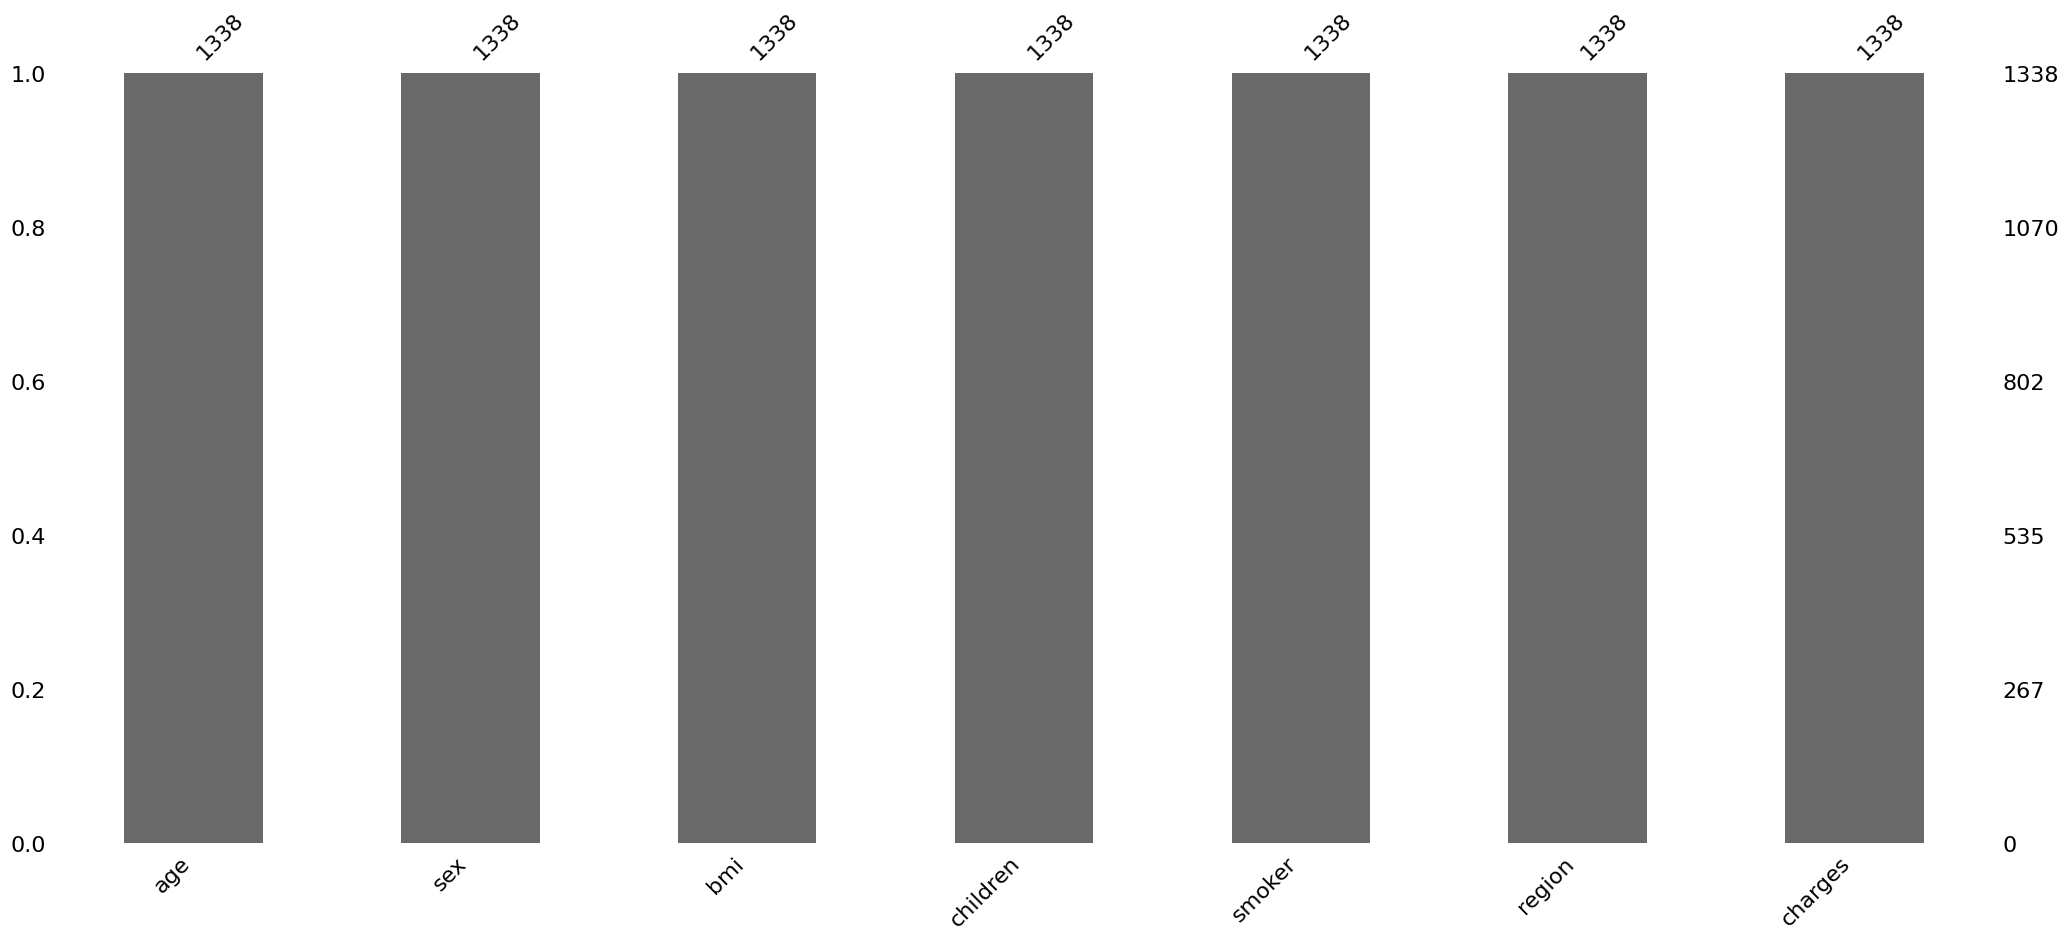

In [7]:
# Check for missing data (vizualization)

msno.bar(dfi) 

In [8]:
# Check for duplicates

dfi.duplicated().sum()

np.int64(1)

In [9]:
# Drop duplicates

dfi.drop_duplicates(keep='first', inplace=True)

In [10]:
# Round bmi to 2 decimal places

dfi['bmi'] = dfi['bmi'].apply(lambda x: round(x, 2))

In [11]:
# Round charges to 2 decimal places

dfi['charges'] = dfi['charges'].apply(lambda x: round(x, 2))

In [12]:
dfi

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [13]:
# Convert smokers column to numeric

dfi['smoker'] = dfi['smoker'].map({'yes': 1, 'no': 0})

In [14]:
# Strip sex column data
dfi['sex'] = dfi['sex'].str.strip()

In [15]:
# Convert sex column to numeric

dfi['sex'] = dfi['sex'].map({'male': 1, 'female': 0})

In [17]:
# Export cleaned data to csv

dfi.to_csv("cleaned_insurance_data_2.csv")